**YANKHAIRUNISA ZAHRA WIRATANIA PUTRI (A11.2022.14328)**

In [1]:
from google.colab import drive # menghubungkan ke google drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/DataKasus-2')

Mounted at /content/drive


In [2]:
import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline #digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV #digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [3]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [6]:
dataset =pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataKasus-2/StudentPerformanceFactors.csv', sep=',', header=None)

In [7]:
dataset.head() # cek dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71


In [8]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6603,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6604,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6605,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6606,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6607,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [9]:
dataset.info() # untuk mengetahui apakah ada yg belum angka atau tidak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6608 non-null   object
 1   1       6608 non-null   object
 2   2       6608 non-null   object
 3   3       6608 non-null   object
 4   4       6608 non-null   object
 5   5       6608 non-null   object
 6   6       6608 non-null   object
 7   7       6608 non-null   object
 8   8       6608 non-null   object
 9   9       6608 non-null   object
 10  10      6608 non-null   object
 11  11      6530 non-null   object
 12  12      6608 non-null   object
 13  13      6608 non-null   object
 14  14      6608 non-null   object
 15  15      6608 non-null   object
 16  16      6518 non-null   object
 17  17      6541 non-null   object
 18  18      6608 non-null   object
 19  19      6608 non-null   object
dtypes: object(20)
memory usage: 1.0+ MB


# cek data kosong

In [10]:
dataset.replace("?", np.nan, inplace= True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6608 non-null   object
 1   1       6608 non-null   object
 2   2       6608 non-null   object
 3   3       6608 non-null   object
 4   4       6608 non-null   object
 5   5       6608 non-null   object
 6   6       6608 non-null   object
 7   7       6608 non-null   object
 8   8       6608 non-null   object
 9   9       6608 non-null   object
 10  10      6608 non-null   object
 11  11      6530 non-null   object
 12  12      6608 non-null   object
 13  13      6608 non-null   object
 14  14      6608 non-null   object
 15  15      6608 non-null   object
 16  16      6518 non-null   object
 17  17      6541 non-null   object
 18  18      6608 non-null   object
 19  19      6608 non-null   object
dtypes: object(20)
memory usage: 1.0+ MB


In [12]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

,0
11,1.180387
16,1.361985
17,1.013923


# cek data duplikat

In [13]:
dataset = dataset.drop_duplicates()

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6608 non-null   object
 1   1       6608 non-null   object
 2   2       6608 non-null   object
 3   3       6608 non-null   object
 4   4       6608 non-null   object
 5   5       6608 non-null   object
 6   6       6608 non-null   object
 7   7       6608 non-null   object
 8   8       6608 non-null   object
 9   9       6608 non-null   object
 10  10      6608 non-null   object
 11  11      6530 non-null   object
 12  12      6608 non-null   object
 13  13      6608 non-null   object
 14  14      6608 non-null   object
 15  15      6608 non-null   object
 16  16      6518 non-null   object
 17  17      6541 non-null   object
 18  18      6608 non-null   object
 19  19      6608 non-null   object
dtypes: object(20)
memory usage: 1.0+ MB


# cek data konstan

In [15]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6608 non-null   object
 1   1       6608 non-null   object
 2   2       6608 non-null   object
 3   3       6608 non-null   object
 4   4       6608 non-null   object
 5   5       6608 non-null   object
 6   6       6608 non-null   object
 7   7       6608 non-null   object
 8   8       6608 non-null   object
 9   9       6608 non-null   object
 10  10      6608 non-null   object
 11  11      6530 non-null   object
 12  12      6608 non-null   object
 13  13      6608 non-null   object
 14  14      6608 non-null   object
 15  15      6608 non-null   object
 16  16      6518 non-null   object
 17  17      6541 non-null   object
 18  18      6608 non-null   object
 19  19      6608 non-null   object
dtypes: object(20)
memory usage: 1.0+ MB


# visualisasi

In [22]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataKasus-2/StudentPerformanceFactors.csv')


In [23]:
df = df.drop(columns=['CategoricalColumn1', 'CategoricalColumn2'], errors='ignore')  # Menggunakan 'ignore' agar tidak error jika kolom tidak ada

In [27]:
# Menghapus kolom kategori jika ada
if 'PerformanceLevel' in df.columns:
    df['PerformanceLevel'] = df['PerformanceLevel'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [28]:
# Membuat DataFrame hanya dengan kolom numerik
numeric_df = df.select_dtypes(include=[float, int])

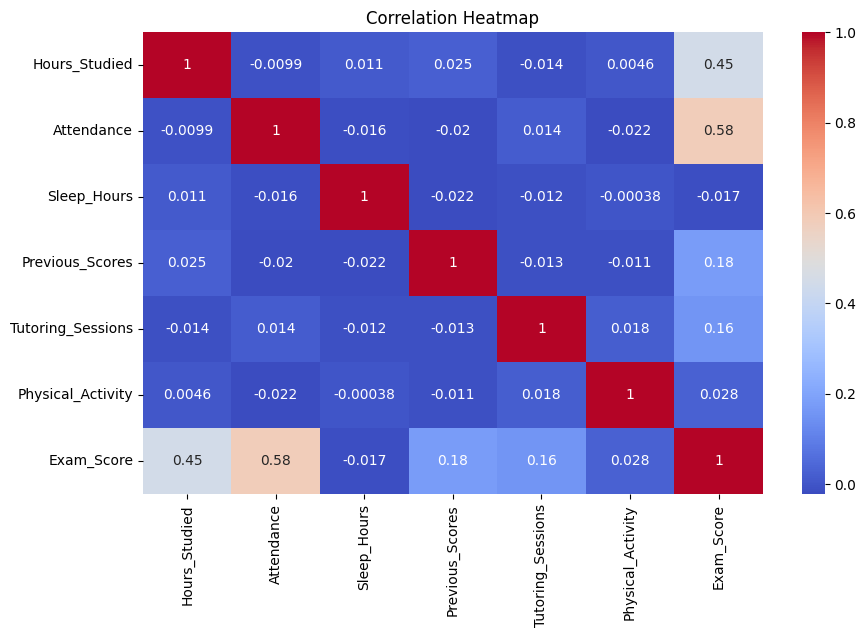

In [29]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from google.colab import drive # menghubungkan ke google drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/DataKasus-2')

Mounted at /content/drive


In [12]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataKasus-2/StudentPerformanceFactors.csv')


In [15]:
print("Kolom dalam dataset:")
print(df.columns)
print("\nTipe data dalam dataset:")
print(df.dtypes)

Kolom dalam dataset:
Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Tipe data dalam dataset:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Infl

In [16]:
# Langkah 4: Memilih kolom yang akan digunakan untuk fungsi Hopkins
# Asumsi kolom yang digunakan hanya yang bertipe numerik
numeric_cols = df.select_dtypes(include=[np.number])

In [17]:
# Langkah 5: Definisikan fungsi Hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)  # Mengambil 10% dari total data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n), m)

    ujd = []
    wjd = []
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0  # Indentasi diperbaiki di sini

    return H

In [18]:
# Langkah 6: Menghitung nilai Hopkins untuk dataset
H_value = hopkins(numeric_cols)
print("\nNilai Hopkins:", H_value)


Nilai Hopkins: 0.7937087444102735


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataKasus-2/StudentPerformanceFactors.csv')


In [25]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(df.select_dtypes(include=[float, int]))  # Pastikan hanya kolom numerik yang dinormalisasi

In [26]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["PC1", "PC2", "PC3"])

In [31]:
# Menampilkan deskripsi dari DataFrame PCA
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,6607.0,-6.667724e-17,1.328650,-4.343076,-0.928327,-0.025497,0.893399,8.096696
PC2,6607.0,-2.043335e-17,1.024685,-3.309751,-0.690853,0.014945,0.694568,3.081882
PC3,6607.0,-1.720703e-17,1.010907,-3.595481,-0.676890,-0.007869,0.678601,3.553676
